In [86]:
#!pip install md2notion

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## 1. Introudction

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from collections import Counter

from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

sns.set(style='white',context='notebook',palette='deep')

import warnings
warnings.filterwarnings(action='ignore')

## 2. Load and Check data

### 2.1 Load Data

In [3]:
train = pd.read_csv(r'C:\Users\moons\OneDrive\바탕 화면\kaggle_project\01. titanic\train.csv')
test = pd.read_csv(r'C:\Users\moons\OneDrive\바탕 화면\kaggle_project\01. titanic\test.csv')
IDtest = test['PassengerId']

In [4]:
display(train,test)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


### 2.2 Outlier detection

In [5]:
# Outlier detection

def detect_outliers(df,n,features):
    outlier_indices = []
    
    #iterate over features(columns)
    for col in features:
        # 1st quartile(25%)
        Q1 = np.percentile(df[col],25)
        # 3rd quartile(75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determin a list of indices of outliers for feature col
        outlier_list_col = df[(df[col]<Q1 - outlier_step) | (df[col]>Q3 + outlier_step)].index
        
        # append the found outlier indices for col to the list of outlier indicies
        outlier_indices.extend(outlier_list_col)
    
    # select observations containing more than 2 outlieers
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(k for k,v in outlier_indices.items() if v > n)
    
    return multiple_outliers

# detect outliers from Age, SibSp, Parch and Fare
# numerical Variables.
Outliers_to_drop = detect_outliers(train,2,['Age','SibSp','Parch','Fare'])

In [6]:
train.loc[Outliers_to_drop] #Show the outliers rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [7]:
train.loc[Outliers_to_drop].shape[0] #Show the outliers rows

10

- 10개의 outlier가 존재한다. 28,29,342 승객은 티켓 가격이 높다.
- 나머지 7개는 SibSp이 매우 높다.

In [8]:
# Outlier 제거하기

train = train.drop(Outliers_to_drop,axis=0).reset_index(drop=True)

### 2.3 Joining train and test set

In [9]:
train_len = len(train)
all_data = pd.concat([train,test],axis=0).reset_index(drop=True)
display(all_data)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1294,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1295,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1296,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1297,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


### 2.4 check for null and missing values.

In [10]:
# Fill empty and NaNs values with NaN
all_data = all_data.fillna(np.nan)

# Check for Null values
all_data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             256
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1007
Embarked          2
dtype: int64

- Age and Cabin feature는 결측치의 중요한 부분이다.
- Survived의 결측치는 test data 부분이다.

In [11]:
# Infos

train.info()
train.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881 entries, 0 to 880
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  881 non-null    int64  
 1   Survived     881 non-null    int64  
 2   Pclass       881 non-null    int64  
 3   Name         881 non-null    object 
 4   Sex          881 non-null    object 
 5   Age          711 non-null    float64
 6   SibSp        881 non-null    int64  
 7   Parch        881 non-null    int64  
 8   Ticket       881 non-null    object 
 9   Fare         881 non-null    float64
 10  Cabin        201 non-null    object 
 11  Embarked     879 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 82.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            170
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          680
Embarked         2
dtype: int64

In [12]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [14]:
## Summarize data
# summarise and statstics
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,881.000000,881.000000,881.000000,711.000000,881.000000,881.000000,881.000000
mean,446.713961,0.385925,2.307605,29.731603,0.455165,0.363224,31.121566
std,256.617021,0.487090,0.835055,14.547835,0.871571,0.791839,47.996249
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,226.000000,0.000000,2.000000,20.250000,0.000000,0.000000,7.895800
50%,448.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,38.000000,1.000000,0.000000,30.500000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


## 3. Feature analysis

### 3.1 Numerical values

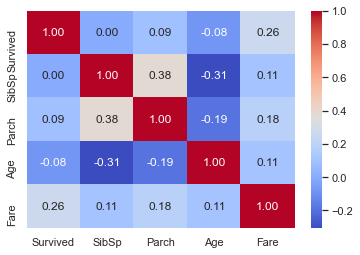

In [15]:
# Correlation matrix between numerical values (SibSp Parch Age and Fare values) and Survived

g = sns.heatmap(train[['Survived','SibSp','Parch','Age','Fare']].corr(),annot=True,fmt='.2f',cmap='coolwarm')

- Fare 변수가 상관계수가 0.26으로 Survived와 가장 양의 상관성이 높다고 판단이된다. 상대적으로
- 이것은 다른 변수가 유용하지 않다는 것은 아니다.

#### SibSp

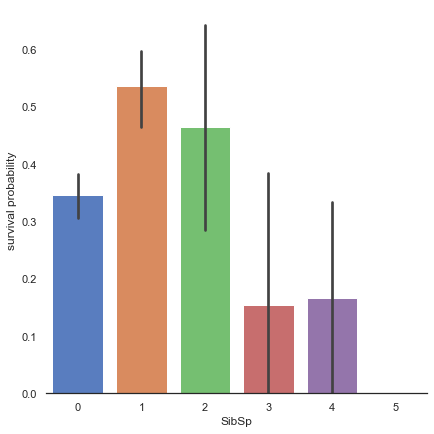

In [16]:
# Explore SibSp feature vs Survived

g = sns.factorplot(x='SibSp',y='Survived',data = train,kind='bar',size=6,palette = 'muted')
g.despine(left=True) # left 축 제거.
g = g.set_ylabels('survival probability')

- SibSp의 값이 크다면, 즉 많은 Siblings/spouses다면, 살아남기가 힘들다.
- 단일 고객(0 SibSp) or 1,2 SibSp(SibSp 1 or 2)은 살아남을 기회가 더욱 있다.
- 이 관측치는 꽤 흥미로우며, 우리는 이 관측치를 통해 새로운 feature를 생성할 수 있다.

#### Parch

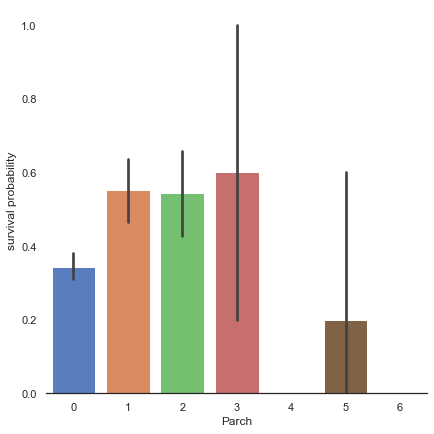

In [17]:
# Explore Parch feature vs Survived
g = sns.factorplot(x='Parch',y='Survived',kind='bar',data=train, palette='muted',size=6)
g.despine(left=True)
g = g.set_ylabels('survival probability')

- family의 수가 적으면 많은 사람보다 살아남을 확률이 더 높다.
- Be careful there is an important standard deviation in the survival of passengers with 3 parents/children.

#### Age

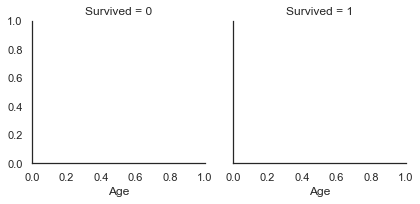

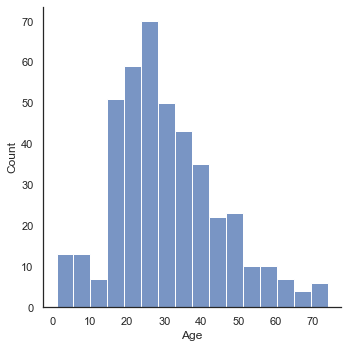

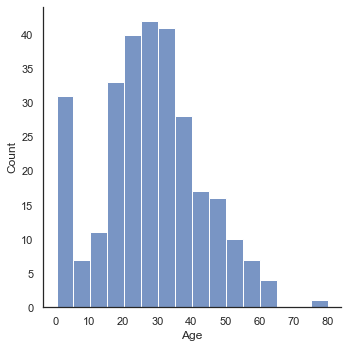

In [18]:
# Explore Age vs Survived

g = sns.FacetGrid(train,col='Survived')
g = g.map(sns.displot,'Age')

- Age의 분포는 정규분포의 형태를 띄고 있다.
- Age 분포를 보면, 살아남은 사람과, 살아남지 않는 사람의 분포차이가 크지 않다.
- 그리고, 젊은 사람이 더욱 살아남았다.
- 60-80대 분들은 많이 살아남지 못한 것을 확인할 수 있다.

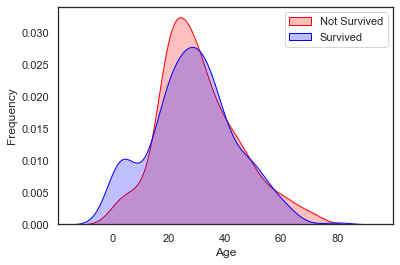

In [19]:
# Explore Age distribution
g = sns.kdeplot(train['Age'][(train['Survived']==0)& (train['Age'].notnull())],color='Red',shade=True)
g = sns.kdeplot(train['Age'][(train['Survived']==1)& (train['Age'].notnull())],ax=g,color='blue',shade=True)
g.set_xlabel('Age')
g.set_ylabel('Frequency')
g = g.legend(['Not Survived','Survived'])

- 2개의 density plot을 보았을 때, peak 값은 젊고 어린 분들에 해당이 된다는 것을 확인할 수 있다.

#### Fare

In [20]:
all_data['Fare'].isnull().sum()

1

In [21]:
#Fill Fare missing values with the median value
all_data['Fare'] = all_data['Fare'].fillna(all_data['Fare'].median())

- 결측치가 1개로, 이 값을 통해 예측값이 크게 변할 것 같지 않다고 판단이 된다. 그래서 중앙값으로 값을 대체한다.

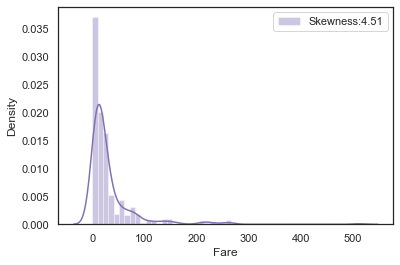

In [22]:
# Explore Fare distiribution
g = sns.distplot(all_data['Fare'],color='m',label='Skewness:%.2f'%(all_data['Fare'].skew()))
g = g.legend(loc='best')

- Fare distribution은 매우 skewed하다. 이러한 분포 형태는 모델에 매우 부정적인 영향을 끼칠 수 있으므로, scaled를 해야한다.
- Scale 방법은 log를 이용해서 할 예정이다.

In [23]:
# Apply log to Fare to reduce skewness distribution.

all_data['Fare'] = all_data['Fare'].map(lambda x: np.log(x) if x>0 else 0)

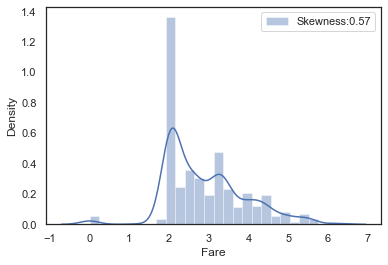

In [24]:
g = sns.distplot(all_data['Fare'],color='b',label = 'Skewness:%.2f'%(all_data['Fare'].skew()))
g = g.legend(loc='best')

- Skewness가 매우 줄어든 것을 확인할 수 있다.

### 3.2 Categorical values

#### Sex

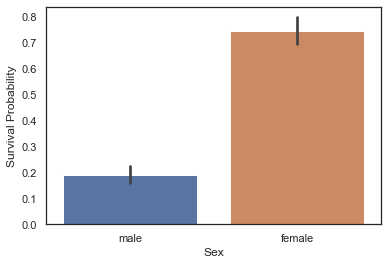

In [25]:
g = sns.barplot(x='Sex',y='Survived',data=train)
g = g.set_ylabel('Survival Probability')

In [26]:
train[['Sex','Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.747573
male,0.190559


- 남자보다는 여자가 살아남을 확률이 높다는 것을 알 수 있다.
- 그래서 Survived 예측에서 Sex는 매우 중요한 역할을 할 수 있다.

#### Pclass

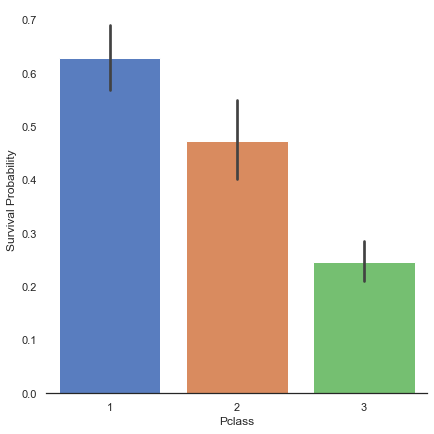

In [27]:
# Explore Pclass vs Survived
g = sns.factorplot(x='Pclass',y='Survived',data=train,kind='bar',size=6,palette = 'muted')
g.despine(left=True)
g = g.set_ylabels('Survival Probability')

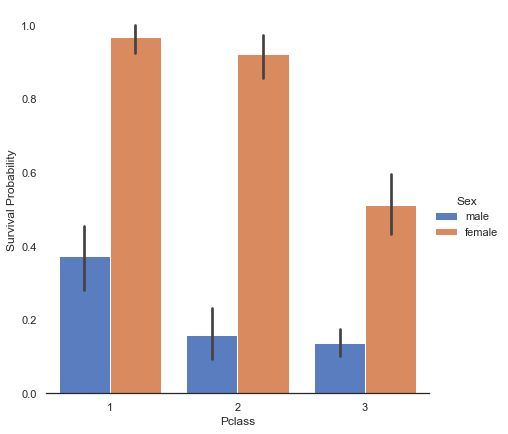

In [28]:
# Explore Pclass vs Survived by Sex

g = sns.factorplot(x='Pclass',y='Survived',hue='Sex',data= train, size=6,kind='bar',palette='muted')
g.despine(left=True)
g = g.set_ylabels('Survival Probability')

- 3가지의 Pclass가 있다. 먼저, 1번 class가 2,3번에 비해 살아남을 확률이 높다.
- 남,녀 구분없이 이 형태는 비슷한 형태를 띈다.

#### Embarked

In [29]:
all_data['Embarked'].isnull().sum()

2

In [30]:
#Fill Embarked nan values of all_data set with 'S' most frequent value

all_data['Embarked'] = all_data['Embarked'].fillna('S')

- 결측치는 2개로, 클래스 중 가장 많은 S class로 대체한다.

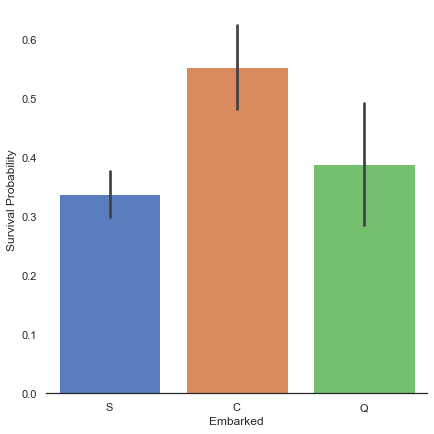

In [31]:
# Explore Embarked vs Survived

g = sns.factorplot(x='Embarked',y='Survived',kind='bar',size=6,data=train,palette = 'muted')
g.despine(left=True)
g = g.set_ylabels('Survival Probability')

- Cherbourg (C) class에서 살아남을 확률이 높다는 것을 알 수 있다.
- 나의 가정에 따르면,Cherbourg(C) 가 Queenstown(Q), Southampton(S)에 비해 인구 비율이 높았을 것이라고 예상이 된다.
- Pclass distribution vs Embarked를 봐보자.

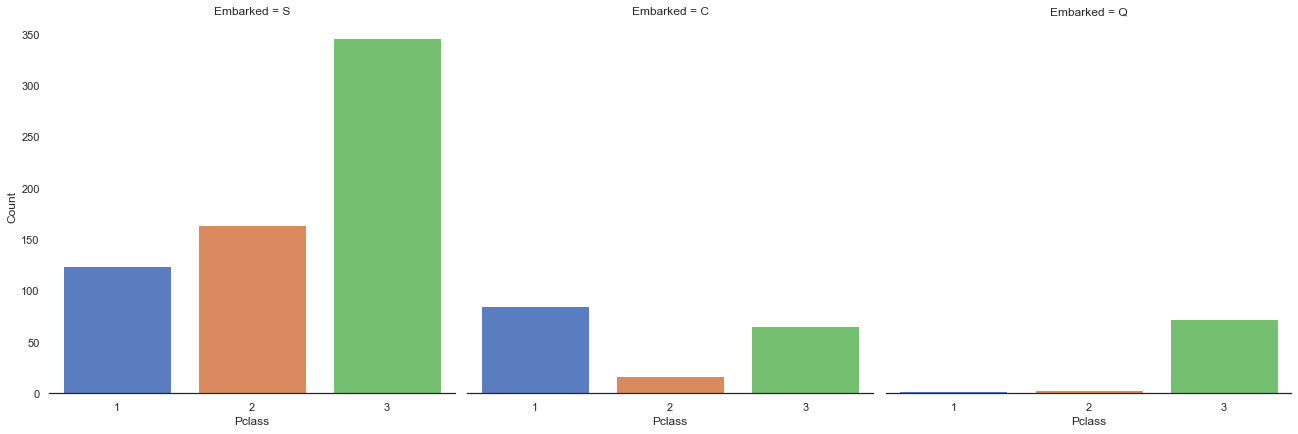

In [32]:
# Explore Pclass vs Embarked
g = sns.factorplot('Pclass',col='Embarked',data=train,size=6,kind='count',palette='muted')
g.despine(left=True)
g= g.set_ylabels('Count')

- Southampton (S) and Queenstown (Q) 같은 경우, 3등석에 사람이 가장 많은 것으로 보인다. 반면에, Cherbourg의 승객은 1등석이 가장 많은 것을 볼 수 있다.
- 현 시점에서, 나는 왜 1번째 class가 생존율이 가장 높은지 알 수 없다.
- 나의 가정은 1번째 class는 퇴실 기간 동안 우선시 되었을 것 같다.(어떠한 이유로)

## 4. Filling missing Values

#### 4.1 Age

- Age 변수는 256개의 결측치가 존재한다.
- Children, Young people이 생존 기회가 더 많은 것을 유지하고 결측값을 대체해야한다.
- 이러한 문제를 따르면, 나는 Age와(Sex, Parch, Pclass, Shisp) 범주형 변수들과 correlation을 봐보려고 한다.

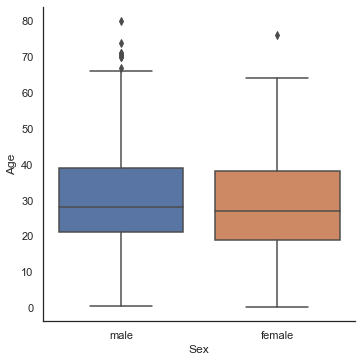

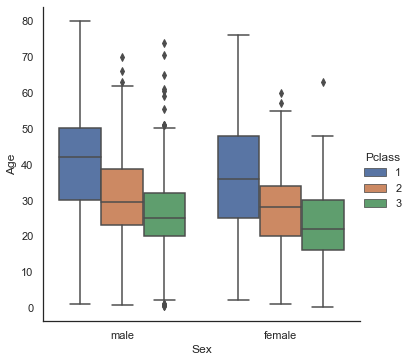

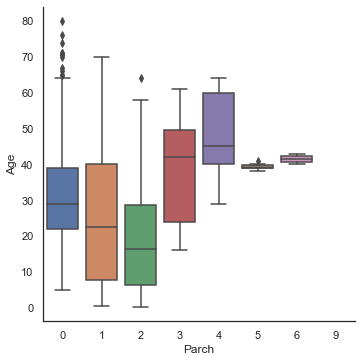

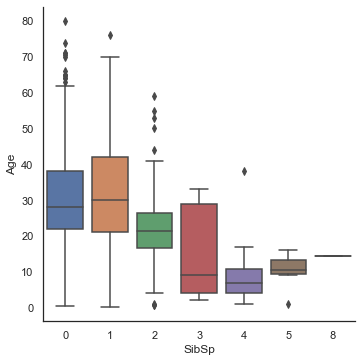

In [33]:
# Explore Age vs Sex, Parch, Pclass and SibSp
g = sns.factorplot(y='Age',x='Sex',data=all_data,kind='box')
g = sns.factorplot(y='Age',x='Sex',hue='Pclass',data=all_data,kind='box')
g = sns.factorplot(y='Age',x='Parch',data=all_data,kind='box')
g = sns.factorplot(y='Age',x='SibSp',data=all_data,kind='box')

- Age distribution은 남,여 구분 없이 비슷하여, 나이 예측에는 크게 기여하지 못할 것이라고 판단이 된다.
- 하지만,1st class 는, 2,3 class보다 사람의 나이가 많은 것을 알 수 있다.
- 또한, 승객이 부모/자식을 더 많이 가질수록 나이가 더 많고, 승객은 더 어린 형제/자매를 더 많이 가질수록 젊다.

In [34]:
# convert Sex into caegorical value 0 for male and 1 for male.
all_data['Sex'] = all_data['Sex'].map({'male':0,'female':1})

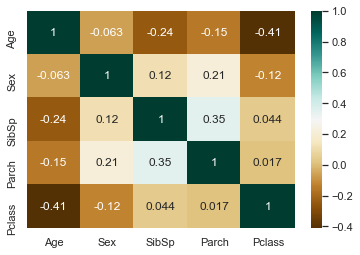

In [35]:
g = sns.heatmap(all_data[['Age','Sex','SibSp','Parch','Pclass']].corr(),cmap='BrBG',annot=True)

- Parch를 제외한 The correlation map을 형성한다.
- Age는 Sex와 correlation하지 않고, SibSp, Parch, PClass는 음의 상관관계를 가진다.
- Parch의 값을 확인해보면, 나이는 부모/자녀의 수에 따라 증가한다.
- 그러나 일반적으로 correlation은 음의 상관관계를 지닌다.
- 그래서, 나는 SibSp, Parch and Pclass를 활용하여 Age 결측치를 대체할 생각이다.
- Pclass, Parch 및 SibSp에 따라 유사한 행의 중위수로 나이를 채우는 것이 전략입니다.

In [36]:
# Filling missing value of Age

## Fill Age with the median age of similar rows according to Pclass, Parch and SibSp

# Index of NaN age rows.
index_NaN_age = list(all_data['Age'][all_data['Age'].isnull()].index)

for i in index_NaN_age :
    age_med = all_data['Age'].median()
    age_pred = all_data['Age'][((all_data['SibSp']==all_data.iloc[i]['SibSp']) & (all_data['Parch']==all_data.iloc[i]['Parch']) & (all_data['Pclass']==all_data.iloc[i]['Pclass']))].median()
    if not np.isnan(age_pred):
        all_data['Age'].iloc[i] = age_pred
    else:
        all_data['Age'].iloc[i] = age_med


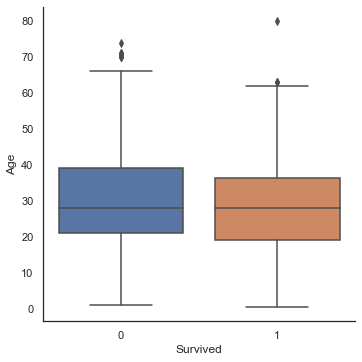

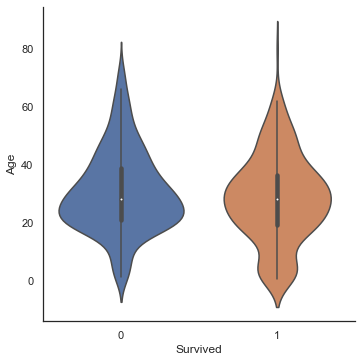

In [37]:
g = sns.factorplot(x='Survived',y='Age',data=train,kind='box')
g = sns.factorplot(x='Survived',y='Age',data=train,kind='violin') 

- 살아남기, 살아남지 못한 사람들의 age에 관련해서는 분포에 큰 차이가 없다.
- 하지만, 살아남은 승객의 violin plot을 보면, 젊은사람이 더 잘 살아남았다는 것을 알 수 있다.

## 5. Feature engineering

### 5.1 Name/Title

In [38]:
all_data['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

- 이름 feature는 중요한 승객의 title을 가지고 있다.
- Title은 모델에 흥미로운 영향을 끼칠 수 있다.

In [39]:
# Get Title from Name
all_data_title = [i.split(",")[1].split(".")[0].strip() for i in all_data['Name']]
all_data['Title'] = pd.Series(all_data_title)
all_data['Title'].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

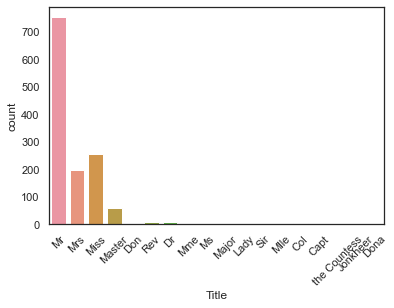

In [40]:
g = sns.countplot(x='Title',data=all_data)
g = plt.setp(g.get_xticklabels(),rotation=45)

- data에 총 17개의 title을 가지고 있고, 대부분 희귀하여 우리는 4개의 카테고리로 grouping 하겠다.

In [41]:
# Convert to categorical values Title

all_data['Title'] = all_data['Title'].replace(['Lady','the Countess','Capt','Countess','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'],'Rare')
all_data['Title'] = all_data['Title'].map({"Master":0,'Miss':1,'Mme':1,"Ms":1,"Mlle":1,"Mrs":1,"Mr":2,"Rare":3})
all_data['Title'] = all_data['Title'].astype(int)

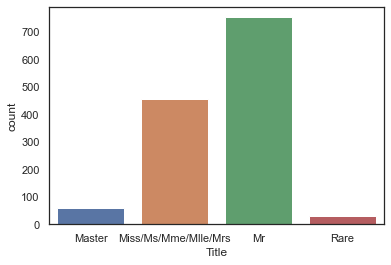

In [42]:
g = sns.countplot(all_data['Title'])
g = g.set_xticklabels(['Master','Miss/Ms/Mme/Mlle/Mrs',"Mr","Rare"])

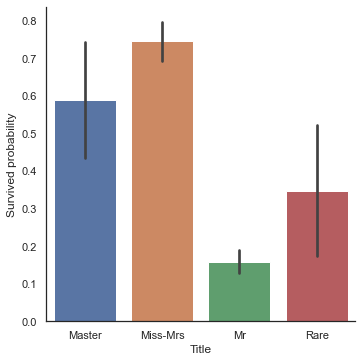

In [43]:
g = sns.factorplot(x='Title',y='Survived',data=all_data,kind='bar')
g = g.set_xticklabels(['Master','Miss-Mrs','Mr','Rare'])
g = g.set_ylabels('Survived probability')

- 여자와 아이들이 우선!
- 희귀한 이름은 의외로 많이 살았다는 것을 알 수 있다.

In [44]:
# Drop Name variable

all_data.drop(labels=['Name'],axis=1,inplace=True)

#### 5.2 Family size

- 가족 수가 많은 사람들은 탈출하기 어렵다는 것을 알 수 있어서 우리는 여동생, 남동생, 부모님을 찾아보려고한다.  
- 그래서 나는 family size라는 변수를 SipSp, Parch, 1(자신)을 통해 추가하려고 한다.

In [45]:
# create a family size descriptor from SibSp and Parch
all_data["Fsize"] = all_data['SibSp']+all_data['Parch']+1

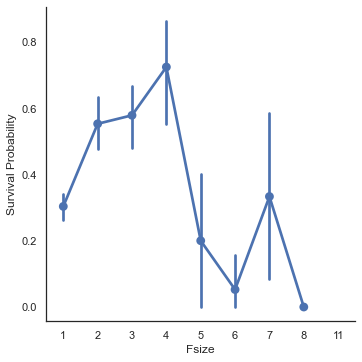

In [46]:
g = sns.factorplot(x='Fsize',y='Survived',data=all_data)
g = g.set_ylabels('Survival Probability')

- family size는 중요한 role이며, 가족수가 많으면 살아남기 힘들다.
- 그래서 family size를 4개의 카테고리로 설정하려고 한다.

In [47]:
# Create new feature of family size
all_data['Single'] = all_data['Fsize'].map(lambda x : 1 if x==1 else 0)
all_data['SmallF'] = all_data['Fsize'].map(lambda x : 1 if x==2 else 0)
all_data['MedF'] = all_data['Fsize'].map(lambda x : 1 if 3<= x <=4 else 0)
all_data['LargeF'] = all_data['Fsize'].map(lambda x : 1 if x>=5 else 0)

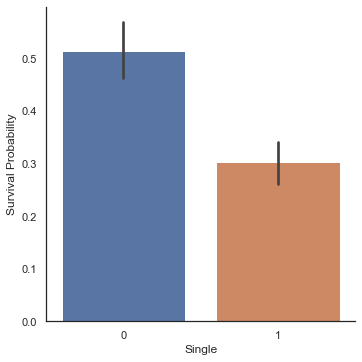

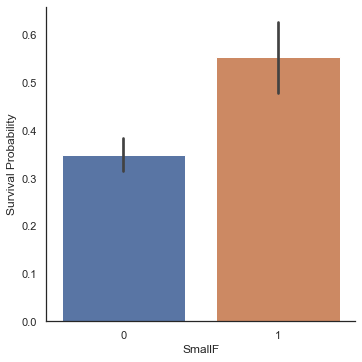

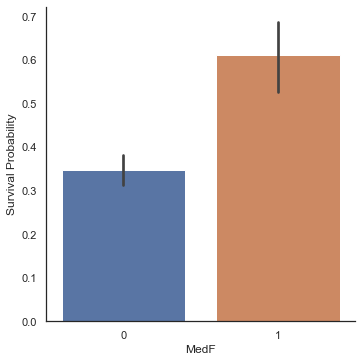

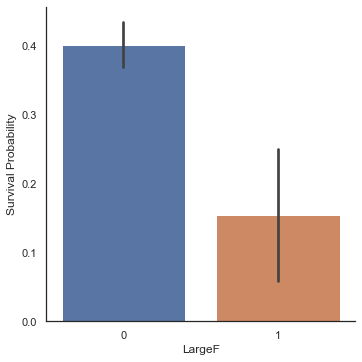

In [48]:
g = sns.factorplot(x='Single',y='Survived',data=all_data,kind='bar')
g = g.set_ylabels('Survival Probability')
g = sns.factorplot(x='SmallF',y='Survived',data=all_data,kind='bar')
g = g.set_ylabels('Survival Probability')
g = sns.factorplot(x='MedF',y='Survived',data=all_data,kind='bar')
g = g.set_ylabels('Survival Probability')
g = sns.factorplot(x='LargeF',y='Survived',data=all_data,kind='bar')
g = g.set_ylabels('Survival Probability')

- Small and Medium families는 single, large family보다 살아남을 확률이 높다는 것을 알 수 있다.

In [49]:
all_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fsize,Single,SmallF,MedF,LargeF
0,1,0.0,3,0,22.0,1,0,A/5 21171,1.981001,NaN,S,2,2,0,1,0,0
1,2,1.0,1,1,38.0,1,0,PC 17599,4.266662,C85,C,1,2,0,1,0,0
2,3,1.0,3,1,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,1,1,0,0,0
3,4,1.0,1,1,35.0,1,0,113803,3.972177,C123,S,1,2,0,1,0,0
4,5,0.0,3,0,35.0,0,0,373450,2.085672,NaN,S,2,1,1,0,0,0


In [50]:
# convert to indicator values Title and Embarked
all_data = pd.get_dummies(all_data,columns=['Title'])
all_data = pd.get_dummies(all_data,columns=['Embarked'],prefix="Em")
#prefix : 생성할 dummy variable의 이름 앞에 붙을 것을 설정 ex) Em_C
all_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,SmallF,MedF,LargeF,Title_0,Title_1,Title_2,Title_3,Em_C,Em_Q,Em_S
0,1,0.0,3,0,22.0,1,0,A/5 21171,1.981001,NaN,...,1,0,0,0,0,1,0,0,0,1
1,2,1.0,1,1,38.0,1,0,PC 17599,4.266662,C85,...,1,0,0,0,1,0,0,1,0,0
2,3,1.0,3,1,26.0,0,0,STON/O2. 3101282,2.070022,NaN,...,0,0,0,0,1,0,0,0,0,1
3,4,1.0,1,1,35.0,1,0,113803,3.972177,C123,...,1,0,0,0,1,0,0,0,0,1
4,5,0.0,3,0,35.0,0,0,373450,2.085672,NaN,...,0,0,0,0,0,1,0,0,0,1


- At this stage, we have 22 features.

#### 5.3 Cabin

In [51]:
all_data['Cabin'].head()

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

In [52]:
all_data['Cabin'].describe()

count                 292
unique                186
top       B57 B59 B63 B66
freq                    5
Name: Cabin, dtype: object

In [53]:
all_data['Cabin'].isnull().sum()

1007

In [54]:
all_data.shape

(1299, 22)

- Cabin feature는 292개의 결측치를 가지고 있다.
- 객실이 없는 승객에게 결측값이 표시되는 것으로 알고 있다.

In [55]:
all_data['Cabin'][all_data['Cabin'].notnull()].head(10)

1      C85
3     C123
6      E46
10      G6
11    C103
21     D56
23      A6
30     B78
51     D33
53     B30
Name: Cabin, dtype: object

In [56]:
# Replace the Cabin number by the type of cabin 'X' if not
all_data['Cabin'] = pd.Series([i[0] if not pd.isnull(i) else 'X' for i in all_data['Cabin']])

In [57]:
all_data['Cabin'].unique()

array(['X', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

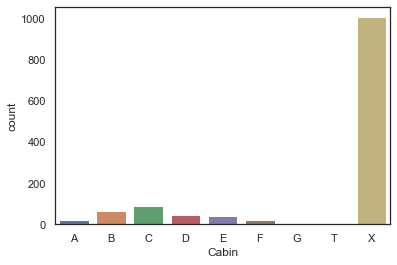

In [58]:
g = sns.countplot(all_data['Cabin'],order=['A','B','C','D','E','F','G','T','X'])

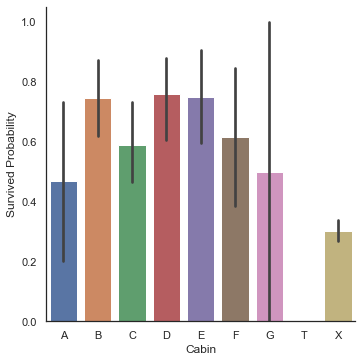

In [59]:
g = sns.factorplot(y='Survived',x='Cabin',data=all_data,kind='bar',order=['A','B','C','D','E','F','G','T','X'])
g = g.set_ylabels('Survived Probability')

- 객실을 가지고 있는 승객의 수가 적기 때문에 생존 확률은 중요한 표준 편차를 가집니다.
- 하지만 우리는 일반적으로 (X)가 없는 승객보다 객실을 가진 승객이 생존할 가능성이 더 높다는 것을 알 수 있습니다.
- 특히 객실 B, C, D, E 및 F에 해당됩니다.

In [60]:
all_data = pd.get_dummies(all_data,columns=['Cabin'],prefix='Cabin')

#### 5.4 Ticket

In [61]:
all_data['Ticket'].head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

- 같은 접두사를 사용하는 티켓이 함께 배치된 Cabin에 예약될 수 있습니다.
- 같은 접두사를 가진 티켓은 유사한 등급과 생존을 가질 수 있습니다.
- 그래서 티켓 특성 열을 ticket 접두사로 바꾸기로 했습니다.

In [62]:
## Treat Ticket by extracting the ticket prefix. When there is no prefix it returns X.

Ticket = []
for i in list(all_data.Ticket):
    if not i.isdigit(): #isdigit() : 문자열이 숫자로 구성되었는지 판별해주는 함수 / 음수나 소숫점이 있을 경우 숫자임에도 불구하고 False를 return.
        Ticket.append(i.replace(".","").replace("/","").strip().split(' ')[0])
    else:
        Ticket.append("X")
        
all_data['Ticket']=Ticket
all_data['Ticket'].head()

0        A5
1        PC
2    STONO2
3         X
4         X
Name: Ticket, dtype: object

In [63]:
all_data = pd.get_dummies(all_data,columns=['Ticket'],prefix="T")
all_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Fsize,Single,...,T_SOTONO2,T_SOTONOQ,T_SP,T_STONO,T_STONO2,T_STONOQ,T_SWPP,T_WC,T_WEP,T_X
0,1,0.0,3,0,22.0,1,0,1.981001,2,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1.0,1,1,38.0,1,0,4.266662,2,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1.0,3,1,26.0,0,0,2.070022,1,1,...,0,0,0,0,1,0,0,0,0,0
3,4,1.0,1,1,35.0,1,0,3.972177,2,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0.0,3,0,35.0,0,0,2.085672,1,1,...,0,0,0,0,0,0,0,0,0,1


In [64]:
# Create categorical values for Pclass

all_data['Pclass'] = all_data['Pclass'].astype('category')
all_data = pd.get_dummies(all_data,columns = ['Pclass'],prefix="Pc")

In [65]:
# Drop useless variables
all_data.drop(labels=['PassengerId'],axis=1,inplace=True)

## 6. Modeling

In [66]:
## Separate train dataset and test dataset

train = all_data[:train_len]
test = all_data[train_len:]
test.drop(labels=['Survived'],axis=1,inplace=True)

In [67]:
## Separate train features and label

train['Survived'] = train['Survived'].astype(int)
Y_train = train['Survived']
X_train = train.drop(['Survived'],axis=1)

### 6.1 Simple modeling

#### 6.1.1 Cross validate models

I compared 10 popular classifiers and evaluate the mean accuracy of each of them by a stratified kfold cross validation procedure.

- SVC
- Decision Tree
- AdaBoost
- Random Forest
- Extra Trees
- Gradient Boosting
- Multiple layer perceptron (neural network)
- KNN
- Logistic regression
- Linear Discriminant Anaylsis

In [71]:
sub= pd.read_csv(r'C:\Users\moons\OneDrive\바탕 화면\kaggle_project\01. titanic\gender_submission.csv')
sub

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [72]:
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=10)

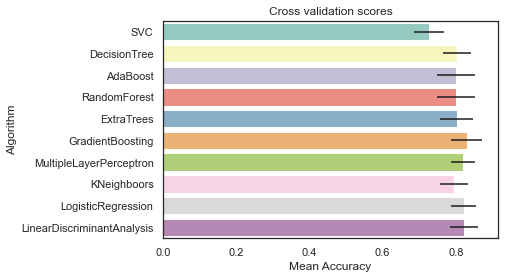

In [73]:
# Modeling step Test differents algorithms 
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = Y_train, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

- 나는 SVC, AdaBoost, RandomForest, ExtraTrees, Gradient Boosting Classifiers를 앙상블 모형을 돌리기위해 선택할 것이다.

#### 6.1.2 Hyperparameter tunning for the best models.


- 나는 Grid Search를 통해 AdaBoost, ExtraTrees, RandomForest, GradientBoosting and SVC classifiers의 hyperparameter를 설정할 것이다.  

In [74]:
### META MODELING  WITH ADABOOST, RF, EXTRATREES and GRADIENTBOOSTING

# Adaboost
DTC = DecisionTreeClassifier()

adaDTC = AdaBoostClassifier(DTC, random_state=7)

ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" :[1,2],
              "learning_rate":  [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5]}

gsadaDTC = GridSearchCV(adaDTC,param_grid = ada_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsadaDTC.fit(X_train,Y_train)

ada_best = gsadaDTC.best_estimator_

Fitting 10 folds for each of 112 candidates, totalling 1120 fits


In [75]:
gsadaDTC.best_score_

0.8241317671092953

In [76]:
#ExtraTrees 
ExtC = ExtraTreesClassifier()


## Search grid for optimal parameters
ex_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsExtC = GridSearchCV(ExtC,param_grid = ex_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsExtC.fit(X_train,Y_train)

ExtC_best = gsExtC.best_estimator_

# Best score
gsExtC.best_score_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


0.8297242083758938

In [77]:
# RFC Parameters tunning 
RFC = RandomForestClassifier()


## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsRFC.fit(X_train,Y_train)

RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


0.8377042900919307

In [78]:
# Gradient boosting tunning

GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsGBC.fit(X_train,Y_train)

GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_

Fitting 10 folds for each of 72 candidates, totalling 720 fits


0.8342824310520939

In [79]:
### SVC classifier
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}

gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsSVMC.fit(X_train,Y_train)

SVMC_best = gsSVMC.best_estimator_

# Best score
gsSVMC.best_score_

Fitting 10 folds for each of 28 candidates, totalling 280 fits


0.8331332992849847

#### 6.1.3 Plot learning curves
- Learning Curve는 훈련 세트에 대한 과적합 효과와 훈련 크기가 정확도에 미치는 영향을 확인할 수 있는 좋은 방법입니다.

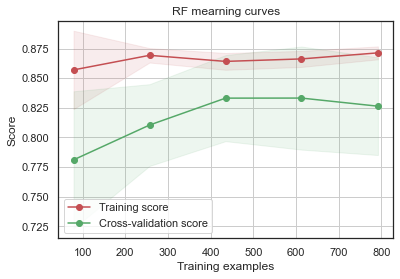

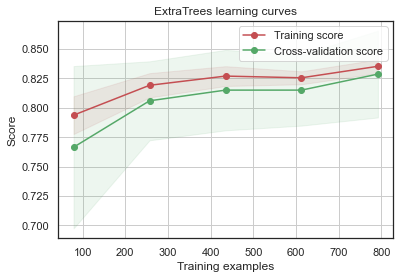

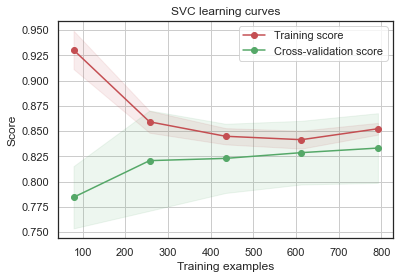

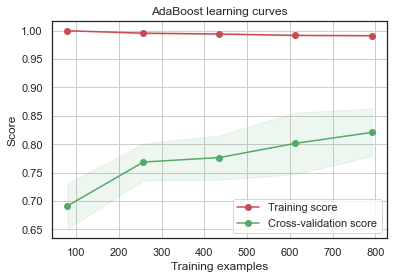

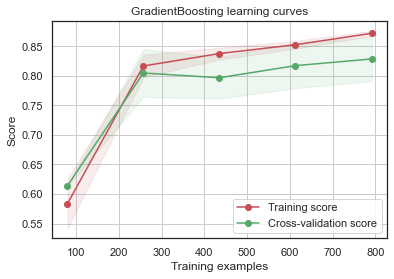

In [80]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    #linspace : 1차원 배열만들기.
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

g = plot_learning_curve(gsRFC.best_estimator_,"RF mearning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsExtC.best_estimator_,"ExtraTrees learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsSVMC.best_estimator_,"SVC learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsadaDTC.best_estimator_,"AdaBoost learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsGBC.best_estimator_,"GradientBoosting learning curves",X_train,Y_train,cv=kfold)

- GradientBoosting 및 Adaboost 분류기는 훈련 세트를 오버핏하는 경향이 있다.
- 증가하는 교차 검증 곡선에 따르면 GradientBoosting과 Adboost는 더 많은 훈련 예시로 더 잘 수행할 수 있다.
- SVC와 ExtraTrees 분류자는 훈련 및 교차 검증 곡선이 서로 가깝기 때문에 예측을 더 잘 일반화하는 것으로 보인다.  

#### 6.1.4 Feature importance of tree based classifiers

In order to see the most informative features for the prediction of passengers survival, i displayed the feature importance for the 4 tree based classifiers.

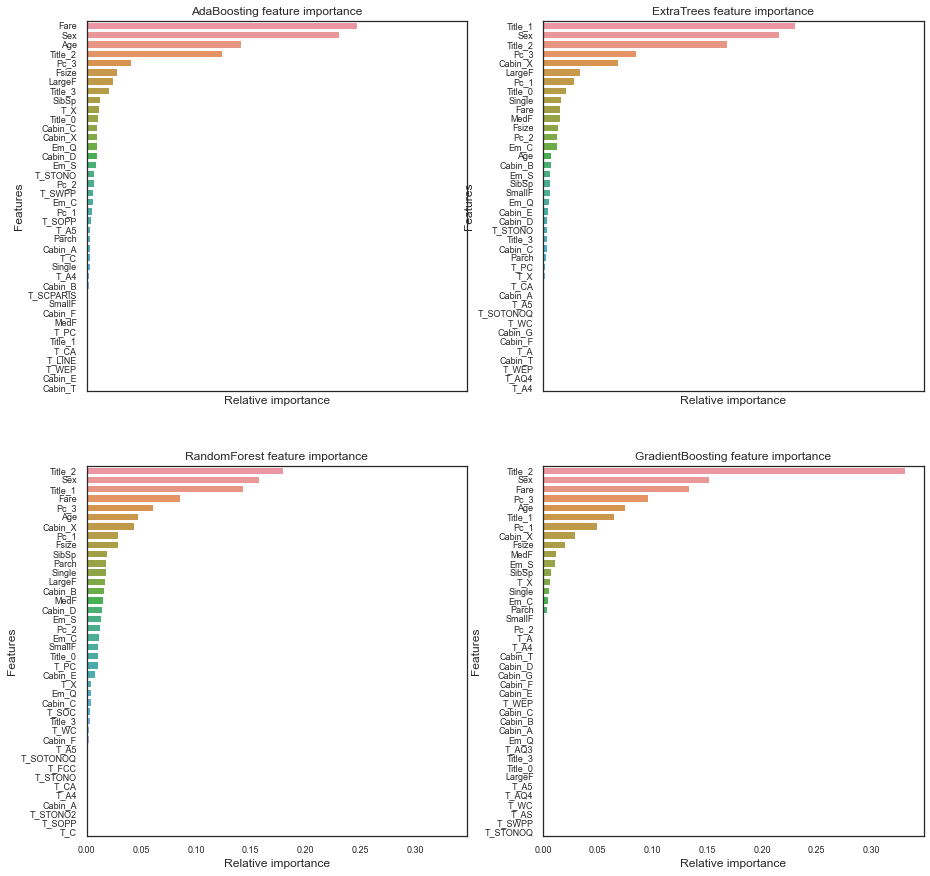

In [81]:
nrows = ncols = 2
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, sharex="all", figsize=(15,15))

names_classifiers = [("AdaBoosting", ada_best),("ExtraTrees",ExtC_best),("RandomForest",RFC_best),("GradientBoosting",GBC_best)]

nclassifier = 0
for row in range(nrows):
    for col in range(ncols):
        name = names_classifiers[nclassifier][0]
        classifier = names_classifiers[nclassifier][1]
        indices = np.argsort(classifier.feature_importances_)[::-1][:40]
        g = sns.barplot(y=X_train.columns[indices][:40],x = classifier.feature_importances_[indices][:40] , orient='h',ax=axes[row][col])
        g.set_xlabel("Relative importance",fontsize=12)
        g.set_ylabel("Features",fontsize=12)
        g.tick_params(labelsize=9)
        g.set_title(name + " feature importance")
        nclassifier += 1

- 네 가지 트리 기반 분류기(Adboost, ExtraTree, RandomForest 및 GradientBoosting)에 대한 기능 중요도를 그림으로 표시합니다.

- 우리는 네 개의 분류자가 상대적인 중요도에 따라 다른 상위 특징을 가지고 있다는 것을 주목한다. 두 사람의 예측이 같은 특징에 근거하지 않는다는 뜻이다.
- 그럼에도 불구하고, 그들은 'Fare', 'Title_2', 'Age', 'Sex'와 같이 분류에 있어 공통적으로 중요한 특징을 공유한다.

- Ms/Mlle/Mme/Miss/Ms 범주가 Sex와 높은 상관관계를 가지고 있음을 나타내는 Title_2입니다.

- 이 4가지 분류기의 특징적 중요성에 따라 생존 예측은 배 안 위치보다 승객의 나이, 성별, 가족 규모, 사회적 지위와 더 관련이 있는 것으로 보인다.

## 6.2 Ensemble modeling

### 6.2.1 Combining models

- 저는 5개의 분류기에서 나오는 예측을 종합하기 위해 투표 분류기를 선택했습니다.
- Soft Voting을 통해 투표를 진행할 것이다.

In [83]:
votingC = VotingClassifier(estimators=[('rfc', RFC_best), ('extc', ExtC_best),
('svc', SVMC_best), ('adac',ada_best),('gbc',GBC_best)], voting='soft', n_jobs=4)

votingC = votingC.fit(X_train, Y_train)

## 6.3 Prediction

### 6.3.1 Predict and Submit results

In [84]:
test_Survived = pd.Series(votingC.predict(test), name="Survived")

results = pd.concat([IDtest,test_Survived],axis=1)

results.to_csv("ensemble_python_voting.csv",index=False)